<a href="https://colab.research.google.com/github/kaizen-abhinav/PDECODE/blob/main/Experiment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Experiment 6: The Inverse Laplace Transform**
After analyzing a system or signal in the frequency domain, we often need to return to the time domain to understand the actual physical behavior—how voltage changes, how a robot arm moves, etc. The** Inverse Laplace Transform**, denoted $\mathcal{L}^{-1}\{F(s)\}$  accomplishes this, converting a function $F(s)$  back into its time-domain equivalent, $f(t)$

#Aim
To compute the Inverse Laplace transform of given s-domain functions and to visualize the connection between the frequency-domain characteristics and the resulting time-domain signal.

#Objectives
- To use SymPy to calculate the inverse Laplace transform of a given function  $F(s)$
.
- To analyze the frequency response (magnitude and phase) of the given $F(s)$
.
- To plot the resulting time-domain function $f(t)$
.
-To visually connect features in the frequency domain (like resonant peaks) to behaviors in the time domain (like oscillations).

# Algorithm
**Problem**: You are given the s-domain function $F(s) = \frac{1}{s^2 + 1}$

. This is the transfer function of an ideal, undamped second-order system (like a frictionless mass-spring or a lossless LC circuit). Analyze its frequency response and find its impulse response in the time domain by computing the inverse Laplace transform.

**Theoretical Result**: This is the classic transform pair for $\sin(t)$



The given F(s) is: 1/(s**2 + 1)
The computed Inverse Laplace Transform f(t) is: sin(t)


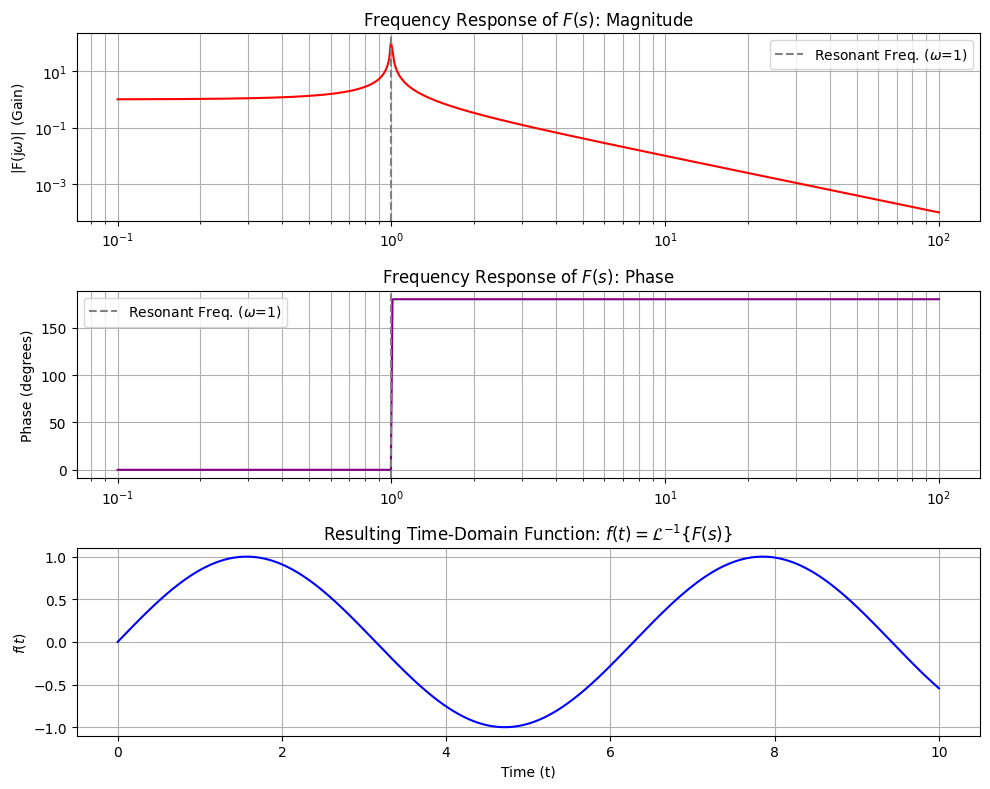

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. & 2. Define symbols ---
s, t, w = sp.symbols('s t w', real=True, positive=True)

# --- 3. Define Laplace-domain function ---
F_s = 1 / (s**2 + 1)

# --- 4. Analyze Frequency Response of F(s) ---
F_jw = F_s.subs(s, 1j * w)
F_jw_func = sp.lambdify(w, F_jw, 'numpy')

w_values = np.logspace(-1, 2, 500)
F_jw_values = F_jw_func(w_values)
magnitude = np.abs(F_jw_values)
phase = np.angle(F_jw_values, deg=True)

# --- 5. Compute Inverse Laplace Transform ---
f_t = sp.inverse_laplace_transform(F_s, s, t, noconds=True)
f_t_func = sp.lambdify(t, f_t, 'numpy')

print(f"The given F(s) is: {F_s}")
print(f"The computed Inverse Laplace Transform f(t) is: {f_t}")

# --- 6. Plotting ---
t_values = np.linspace(0, 10, 500)

plt.figure(figsize=(10, 8))

# Plot Magnitude
plt.subplot(3, 1, 1)
plt.loglog(w_values, magnitude, color='red')
plt.title(r'Frequency Response of $F(s)$: Magnitude')
plt.ylabel(r'|F(j$\omega$)| (Gain)')
plt.axvline(x=1, color='gray', linestyle='--', label=r'Resonant Freq. ($\omega$=1)')
plt.grid(True, which="both", ls="-")
plt.legend()

# Plot Phase
plt.subplot(3, 1, 2)
plt.semilogx(w_values, phase, color='purple')
plt.title(r'Frequency Response of $F(s)$: Phase')
plt.ylabel(r'Phase (degrees)')
plt.axvline(x=1, color='gray', linestyle='--', label=r'Resonant Freq. ($\omega$=1)')
plt.grid(True, which="both", ls="-")
plt.legend()

# Plot Time-domain response f(t)
plt.subplot(3, 1, 3)
plt.plot(t_values, f_t_func(t_values), color='blue')
plt.title(r'Resulting Time-Domain Function: $f(t) = \mathcal{L}^{-1}\{F(s)\}$')
plt.xlabel(r'Time (t)')
plt.ylabel(r'$f(t)$')
plt.grid(True)

plt.tight_layout()
plt.show()

# Results and Discussion
- This example provides a perfect illustration of the connection between the frequency and time domains.

Frequency Domain Analysis: The magnitude plot shows an infinitely sharp resonant peak at $\omega=1$
 rad/s. This tells us the system is extremely sensitive to inputs at this specific frequency and will have a massive response. The phase plot shows an instantaneous 180-degree flip at $\omega=1$
, another hallmark of ideal resonance.

- Time Domain Result: The inverse Laplace transform correctly yields $f(t)=sin(t)$
. The plot of this function is an undamped sine wave that oscillates forever. This is the time-domain manifestation of the infinite resonant peak seen in the frequency domain. An undamped system, when “hit” by an impulse, will oscillate at its natural frequency indefinitely.
